<a href="https://colab.research.google.com/github/matevs77/An-lise-de-dados-com-pandas/blob/main/TitanicFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalar o pandas e importar os arqquivos da biblioteca
!pip install pandas
import pandas as pd

In [ ]:
!pip install kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hesh97/titanicdataset-traincsv")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 19.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hesh97/titanicdataset-traincsv/versions/1


In [2]:
#Fazer o Upload do Arquivo para o Google colab
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
#Confirmar que o arquivo está realmente instalado
ls '/train.csv'

SyntaxError: invalid syntax (<ipython-input-5-ee1589fb0118>, line 2)

In [3]:
#Conectar o Google colab ao Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls '/content/drive/MyDrive/Projeto_pandas/train.csv'

/content/drive/MyDrive/Projeto_pandas/train.csv


In [5]:
# Caminho absoluto ou relativo do arquivo
caminho = '/content/drive/MyDrive/Projeto_pandas/train.csv'

# caminho = '/train.csv' -> Ler o Arquivo de forma temporária com o Pandas
# Lendo o arquivo CSV
df = pd.read_csv(caminho)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Informações gerais
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [30]:
# Estatísticas descritivas
df.describe()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_Known
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208,0.228956
std,257.353842,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [31]:
# Verificar valores faltantes
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [48]:
# Conta valores faltantes por coluna
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# value_counts()
# Conta a frequência de valores únicos em uma coluna
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [7]:
# Preencher valores faltantes em 'Age' com a mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

In [24]:
# A mediana da coluna 'Age'
print("A mediana da coluna Age: ", df['Age'].median())
print("A média da coluna Age: ", df['Age'].mean())
print("A moda da coluna Age: ", df['Age'].mode())

A mediana da coluna Age:  28.0
A média da coluna Age:  29.36158249158249
A moda da coluna Age:  0    28.0
Name: Age, dtype: float64


In [10]:
# Preencher valores faltantes em 'Embarked' com a moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
# Criar uma coluna indicando se a cabine é conhecida
df['Cabin_Known'] = df['Cabin'].notna().astype(int)

In [17]:
# Remover a coluna 'Cabin' original
df = df.drop('Cabin', axis=1)

In [21]:
# Verificar duplicatas
print("Número de duplicatas:", df.duplicated().sum())

# Remover duplicatas
df = df.drop_duplicates()

Número de duplicatas: 0


In [29]:
df.dtypes

,0
PassengerId,int64
Survived,category
Pclass,category
Name,object
Sex,category
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [26]:
# Coluna Pclass: Pclass é um número (1, 2, 3), mas representa categorias. Podemos convertê-la para tipo categórico
df['Pclass'] = df['Pclass'].astype('category')

In [27]:
# Coluna Sex: Garanta que Sex seja categórica
df['Sex'] = df['Sex'].astype('category')

In [28]:
# Coluna Survived: Survived (0 ou 1) pode ser convertida para categórica ou mantida como inteiro:
df['Survived'] = df['Survived'].astype('category')

In [33]:
# Coluna Sex: Verifique os valores únicos para identificar inconsistências
print(df['Sex'].unique())

['male', 'female']
Categories (2, object): ['female', 'male']


In [36]:
print(df['Embarked'].unique())

['Southampton' 'Cherbourg' 'Queenstown']


In [35]:
# Se houver valores inválidos, substitua:
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [37]:
# Extraindo Informações de Strings
# Coluna Name: A coluna Name contém títulos (ex.: Mr., Mrs.) que podem ser úteis. Extraia-os
# Extrair o título do nome
# Isso cria uma nova coluna com títulos como "Mr", "Mrs", "Miss", etc.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Cabin_Known  891 non-null    int64   
 12  Title        891 non-null    object  
dtypes: category(3), float64(2), int64(4), object(4)
memory usage: 72.7+ KB


In [45]:
# Informações gerais
print(df.info())

# Valores faltantes
print(df.isna().sum())

# Primeiras linhas
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Cabin_Known  891 non-null    int64   
 12  Title        891 non-null    object  
dtypes: category(3), float64(2), int64(4), object(4)
memory usage: 72.7+ KB
None
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Known,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,0,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Queenstown,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,Southampton,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Southampton,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Southampton,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Cherbourg,0,Mrs


In [46]:
# Salvamento: Após a limpeza, salve o dataset limpo
df.to_csv('/content/titanic_limpo.csv', index=False)

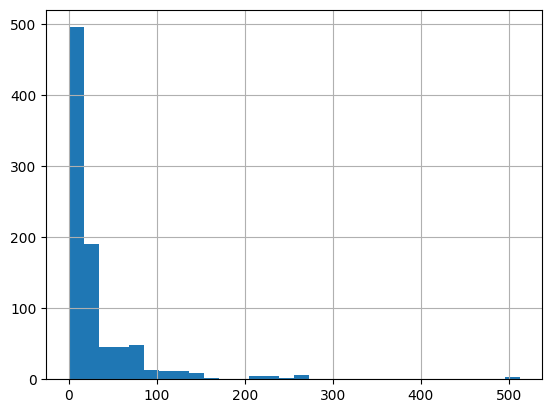

In [47]:
# Visualização: Use gráficos para identificar problemas (ex.: histogramas para outliers)
import matplotlib.pyplot as plt
df['Fare'].hist(bins=30)
plt.show()